In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from data_utils import load_CIFAR10

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
cifar_dr = 'cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar_dr)

In [3]:
print('Training Data Features Size is {0}'.format(X_train.shape))
print('Training Data Labels Size is {0}'.format(y_train.shape))
print('Testing Data Features Size is {0}'.format(X_test.shape))
print('Testing Data Labels Size is {0}'.format(y_test.shape))

Training Data Features Size is (50000, 32, 32, 3)
Training Data Labels Size is (50000,)
Testing Data Features Size is (10000, 32, 32, 3)
Testing Data Labels Size is (10000,)


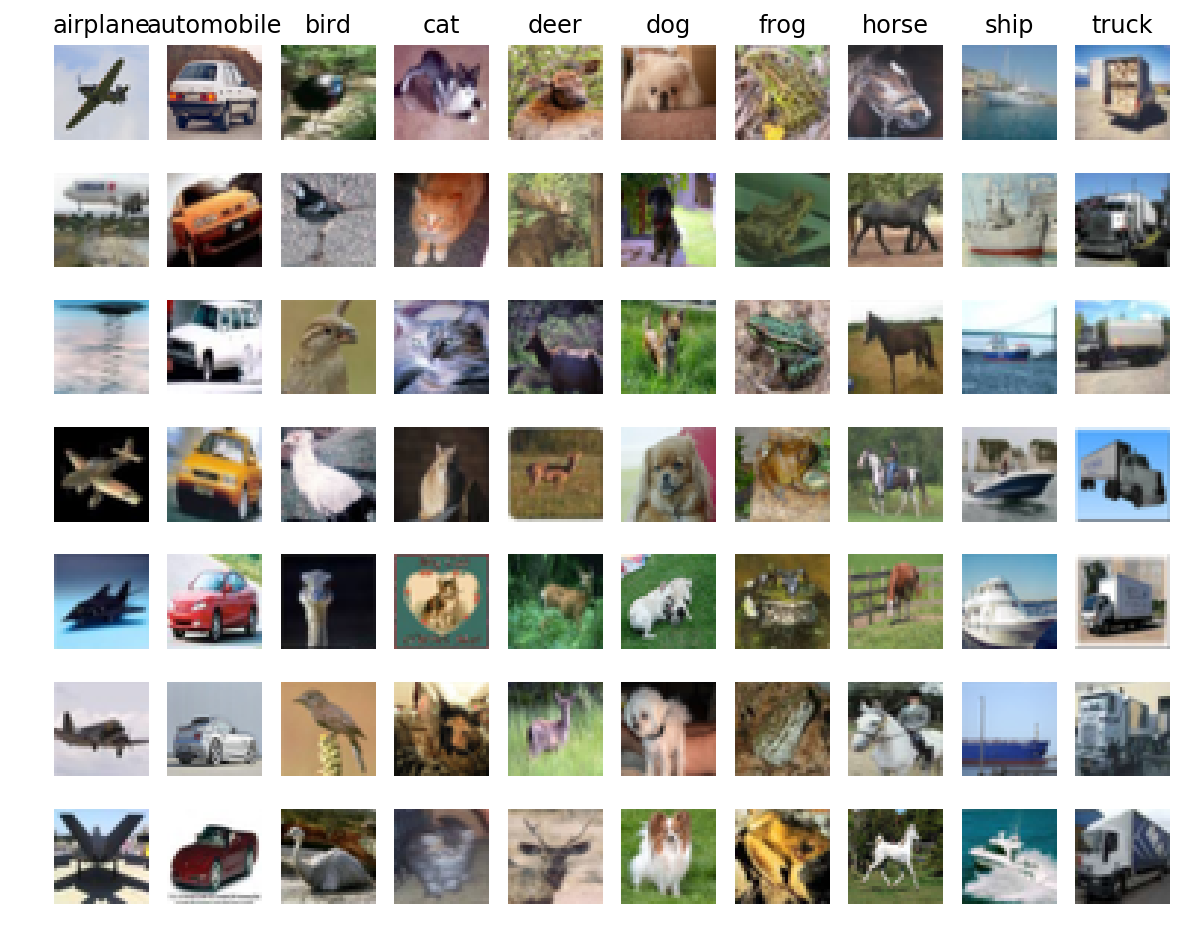

In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_per_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, sample_per_class, replace = False)
    for i, idx in enumerate(idxs):
        plot_idx = y + (num_classes * i) + 1
        plt.subplot(sample_per_class, num_classes, plot_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()
    

In [5]:
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_training, num_dev, replace = False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [6]:
print('Train data shape: {0}'.format(X_train.shape))
print('Train labels shape: {0}'.format(y_train.shape))
print('Validation data shape: {0}'.format(X_val.shape))
print('Validation labels shape: {0}'.format(y_val.shape))
print('Train Dev data shape: {0}'.format(X_dev.shape))
print('Train Dev labels shape: {0}'.format(y_dev.shape))
print('Test data shape: {0}'.format(X_test.shape))
print('Test labels shape: {0}'.format(y_test.shape))

Train data shape: (49000, 32, 32, 3)
Train labels shape: (49000,)
Validation data shape: (1000, 32, 32, 3)
Validation labels shape: (1000,)
Train Dev data shape: (500, 32, 32, 3)
Train Dev labels shape: (500,)
Test data shape: (1000, 32, 32, 3)
Test labels shape: (1000,)


In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [8]:
print('Train data shape: {0}'.format(X_train.shape))
print('Train labels shape: {0}'.format(y_train.shape))
print('Validation data shape: {0}'.format(X_val.shape))
print('Validation labels shape: {0}'.format(y_val.shape))
print('Train Dev data shape: {0}'.format(X_dev.shape))
print('Train Dev labels shape: {0}'.format(y_dev.shape))
print('Test data shape: {0}'.format(X_test.shape))
print('Test labels shape: {0}'.format(y_test.shape))

Train data shape: (49000, 3072)
Train labels shape: (49000,)
Validation data shape: (1000, 3072)
Validation labels shape: (1000,)
Train Dev data shape: (500, 3072)
Train Dev labels shape: (500,)
Test data shape: (1000, 3072)
Test labels shape: (1000,)


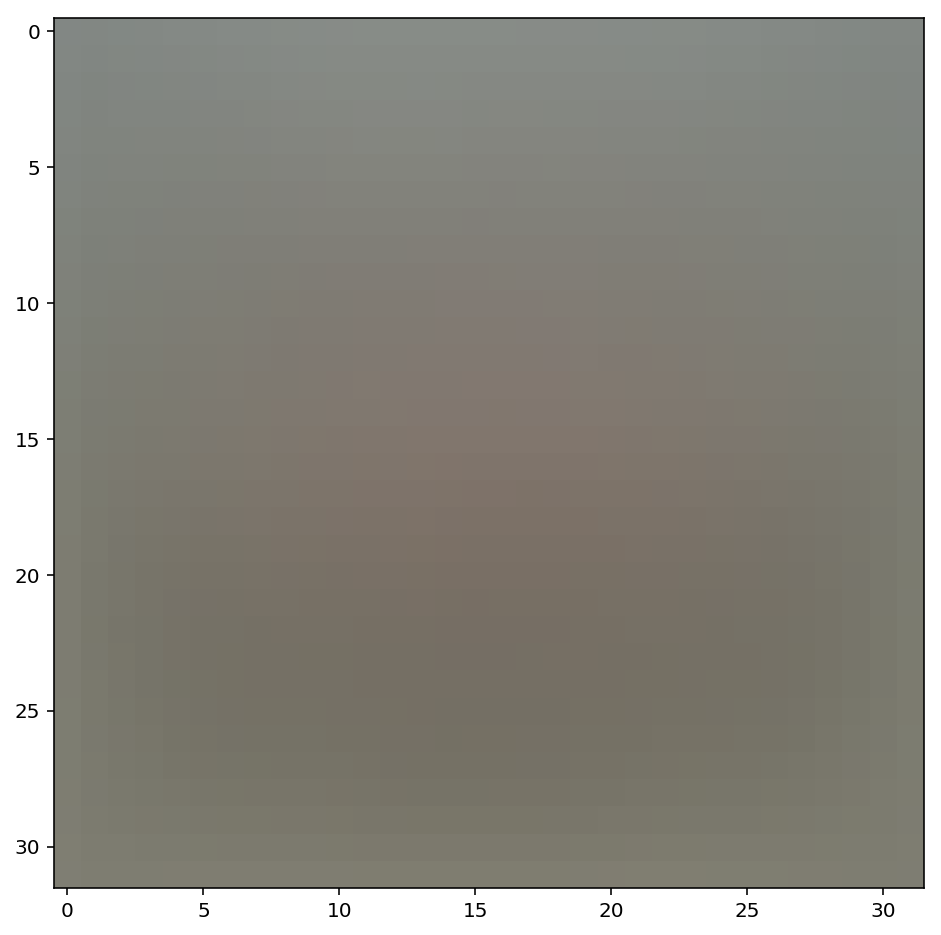

In [9]:
mean_image = np.mean(X_train, axis=0)
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

In [10]:
X_train -= mean_image
X_dev -= mean_image
X_val -= mean_image
X_test -= mean_image

In [11]:
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

In [12]:
print('Train data shape: {0}'.format(X_train.shape))
print('Train labels shape: {0}'.format(y_train.shape))
print('Validation data shape: {0}'.format(X_val.shape))
print('Validation labels shape: {0}'.format(y_val.shape))
print('Train Dev data shape: {0}'.format(X_dev.shape))
print('Train Dev labels shape: {0}'.format(y_dev.shape))
print('Test data shape: {0}'.format(X_test.shape))
print('Test labels shape: {0}'.format(y_test.shape))

Train data shape: (49000, 3073)
Train labels shape: (49000,)
Validation data shape: (1000, 3073)
Validation labels shape: (1000,)
Train Dev data shape: (500, 3073)
Train Dev labels shape: (500,)
Test data shape: (1000, 3073)
Test labels shape: (1000,)


In [147]:
W = np.random.rand(3073, 10) * 0.0001
print(W.shape)

(3073, 10)


In [324]:
def svm_loss(W, X, y, reg):
    loss = 0.0
    num_train = X.shape[0]
    num_classes = W.shape[1]
    dw = np.zeros(W.shape)
    
    delta = 1
    scores = np.dot(X, W)
    margins = scores - scores[np.arange(num_train), y][:, None] + delta
    margins[np.arange(X.shape[0]), y] = 0
    margins = np.maximum(0, margins)
    loss = np.sum(margins) / num_train
    loss += 0.5 * reg * np.sum(W * W)
    
    coeff_matrix = np.zeros((num_train, num_classes))
    coeff_matrix[margins > 0] = 1
    coeff_matrix[np.arange(X.shape[0]), y] = -np.sum(coeff_matrix, axis=1)
    dw = (X.T).dot(coeff_matrix)
    dw = dw/num_train + reg*W
    return loss, dw

In [325]:
#classifier = SVMClassifier(W, X_dev, y_dev, 0.0)
#loss, grad = classifier.loss()

In [353]:
loss, grad = svm_loss(W, X_dev, y_dev, 0.0)
print(loss)
from gradient_check import grad_check_sparse
f = lambda w: svm_loss(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

8.95772505249
numerical: -13.743418367262448 analytic: -12.700419512703055, relative error: 0.0394420378499444 
numerical: 1.3664612246166994 analytic: -1.5730938692211514, relative error: 1.0 
numerical: 5.201051428738168 analytic: -0.32432221574342585, relative error: 1.0 
numerical: -2.4775795917086896 analytic: 14.821147147022089, relative error: 1.0 
numerical: 6.903999999874343 analytic: -5.746461341107883, relative error: 1.0 
numerical: 8.204377959142306 analytic: 18.653093327780137, relative error: 0.38904315514340937 
numerical: -9.98458979601935 analytic: -9.001227863390204, relative error: 0.05179455266398717 
numerical: 5.9594604081780735 analytic: 11.202821007913354, relative error: 0.3055165261897572 
numerical: -29.9943551019588 analytic: -29.65030974593914, relative error: 0.005768250301967866 
numerical: -18.92174040811767 analytic: -1.7853553269470508, relative error: 0.8275610109896977 


In [354]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 1e2)
print(loss)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad)

8.91984119548
numerical: 7.29983530334266 analytic: 5.732270895173697, relative error: 0.1202848092465225 
numerical: -7.115681825986541 analytic: -5.617433172903027, relative error: 0.11766552436023496 
numerical: -1.4514800700915484 analytic: -1.8383188048679433, relative error: 0.1175873509231345 
numerical: -1.6517074531208207 analytic: -1.0827588817351852, relative error: 0.20806567048688707 
numerical: 10.79859480634937 analytic: 11.846668765502592, relative error: 0.04628225923835023 
numerical: -10.408359259184152 analytic: -13.283312565359958, relative error: 0.12134868857998492 
numerical: 20.88083004316843 analytic: 23.304278696354032, relative error: 0.054847633565239785 
numerical: -13.287083787449914 analytic: -12.259020358802038, relative error: 0.0402434524952295 
numerical: 7.349797695521686 analytic: 8.23736936898663, relative error: 0.05694246233402658 
numerical: 13.618106779755832 analytic: 13.597668004234176, relative error: 0.000750990030005669 


In [335]:
import time
tic = time.time()
loss, _ = svm_loss(W, X_dev, y_dev, 0.00001)
toc = time.time()
print('Loss: {0} computed in {1}'.format(loss, toc - tic))

Loss: 8.91470332239244 computed in 0.007963180541992188


In [390]:
class SVMClassifier(object):
        
    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
        num_train, dim = X.shape
        num_classes = np.max(y) + 1
        self.W =  0.001 * np.random.randn(dim, num_classes)
        
        loss_history = []
        for it in range(num_iters):
            random_idxs = np.random.choice(np.arange(num_train), batch_size, replace = True)
            X_batch = X[random_idxs]
            y_batch = y[random_idxs]
            loss, grad = self.loss(self.W, X_batch, y_batch, reg)
            loss_history.append(loss)
            self.W -= learning_rate * grad
            if verbose and it % 100 == 0:
                print('iteration {0} / {1}: loss {2}'.format(it, num_iters, loss))
        return loss_history
    
    
    def predict(self, X):
        scores = X.dot(self.W)
        y_pred = np.argmax(scores, axis = 1)
        return y_pred
    
    def loss(self, W, X, y, reg):
        loss = 0.0
        num_train = X.shape[0]
        num_classes = W.shape[1]
        dw = np.zeros(W.shape)
    
        delta = 1
        scores = np.dot(X, W)
        margins = scores - scores[np.arange(num_train), y][:, None] + delta
        margins[np.arange(X.shape[0]), y] = 0
        margins = np.maximum(0, margins)
        loss = np.sum(margins) / num_train
        loss += 0.5 * reg * np.sum(W * W)
        coeff_matrix = np.zeros((num_train, num_classes))
        coeff_matrix[margins > 0] = 1
        coeff_matrix[np.arange(X.shape[0]), y] = -np.sum(coeff_matrix, axis=1)
        dw = (X.T).dot(coeff_matrix)
        dw = dw/num_train + reg*W
        return loss, dw

In [414]:
svm = SVMClassifier()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {0}'.format(toc - tic))

iteration 0 / 1500: loss 792.3514233455911
iteration 100 / 1500: loss 287.4250637192723
iteration 200 / 1500: loss 107.24018588400367
iteration 300 / 1500: loss 42.194919998462034
iteration 400 / 1500: loss 19.417875960353804
iteration 500 / 1500: loss 10.190565626526087
iteration 600 / 1500: loss 6.573142327629359
iteration 700 / 1500: loss 6.176036475924366
iteration 800 / 1500: loss 5.318134357244199
iteration 900 / 1500: loss 5.704313752743609
iteration 1000 / 1500: loss 4.937677306275228
iteration 1100 / 1500: loss 5.7623320912413725
iteration 1200 / 1500: loss 5.368795265046858
iteration 1300 / 1500: loss 5.0431974807033795
iteration 1400 / 1500: loss 4.709987211871123
That took 3.0185210704803467


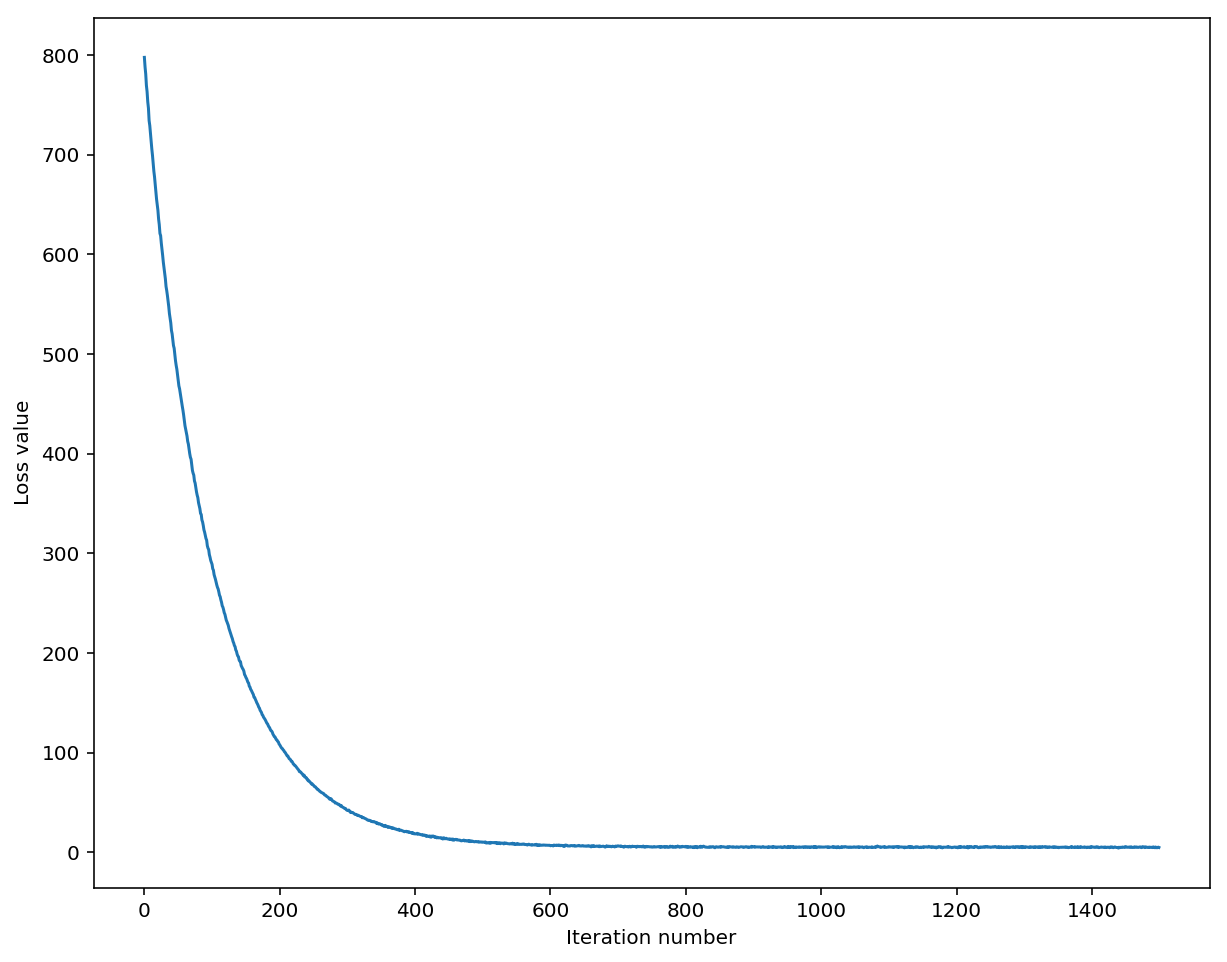

In [392]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [394]:
y_train_pred = svm.predict(X_train)
print('training accuracy: {0}'.format(np.mean(y_train == y_train_pred)))
y_val_pred = svm.predict(X_val)
print('validation accuracy: {0}'.format(np.mean(y_val == y_val_pred)))

training accuracy: 0.3726734693877551
validation accuracy: 0.387


In [539]:
learning_rates = [-7]
regularization_strengths = [4, 4.5]

results = {}
best_val = -1
best_svm = None
max_count = 5
for i in range(max_count):
    lr = 10**learning_rates[0]
    reg = 10**random.uniform(regularization_strengths[0], regularization_strengths[1])
    svm = SVMClassifier()
    loss_hist = svm.train(X_train, y_train, lr, reg, num_iters=2000)
    y_train_pred = svm.predict(X_train)
    train_accuracy = np.mean(y_train == y_train_pred)
    y_val_pred = svm.predict(X_val)
    val_accuracy = np.mean(y_val == y_val_pred)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_svm = svm           
    results[(lr,reg)] = train_accuracy, val_accuracy

for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr {0} reg {1} train accuracy: {2} val accuracy: {3}'.format(
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: {0}'.format(best_val))

lr 1e-07 reg 12087.515803204156 train accuracy: 0.3883061224489796 val accuracy: 0.408
lr 1e-07 reg 18460.415428338863 train accuracy: 0.3856326530612245 val accuracy: 0.378
lr 1e-07 reg 19504.10746109857 train accuracy: 0.38226530612244897 val accuracy: 0.387
lr 1e-07 reg 24210.50602251148 train accuracy: 0.38073469387755104 val accuracy: 0.366
lr 1e-07 reg 28954.204181814304 train accuracy: 0.37779591836734694 val accuracy: 0.386
best validation accuracy achieved during cross-validation: 0.408


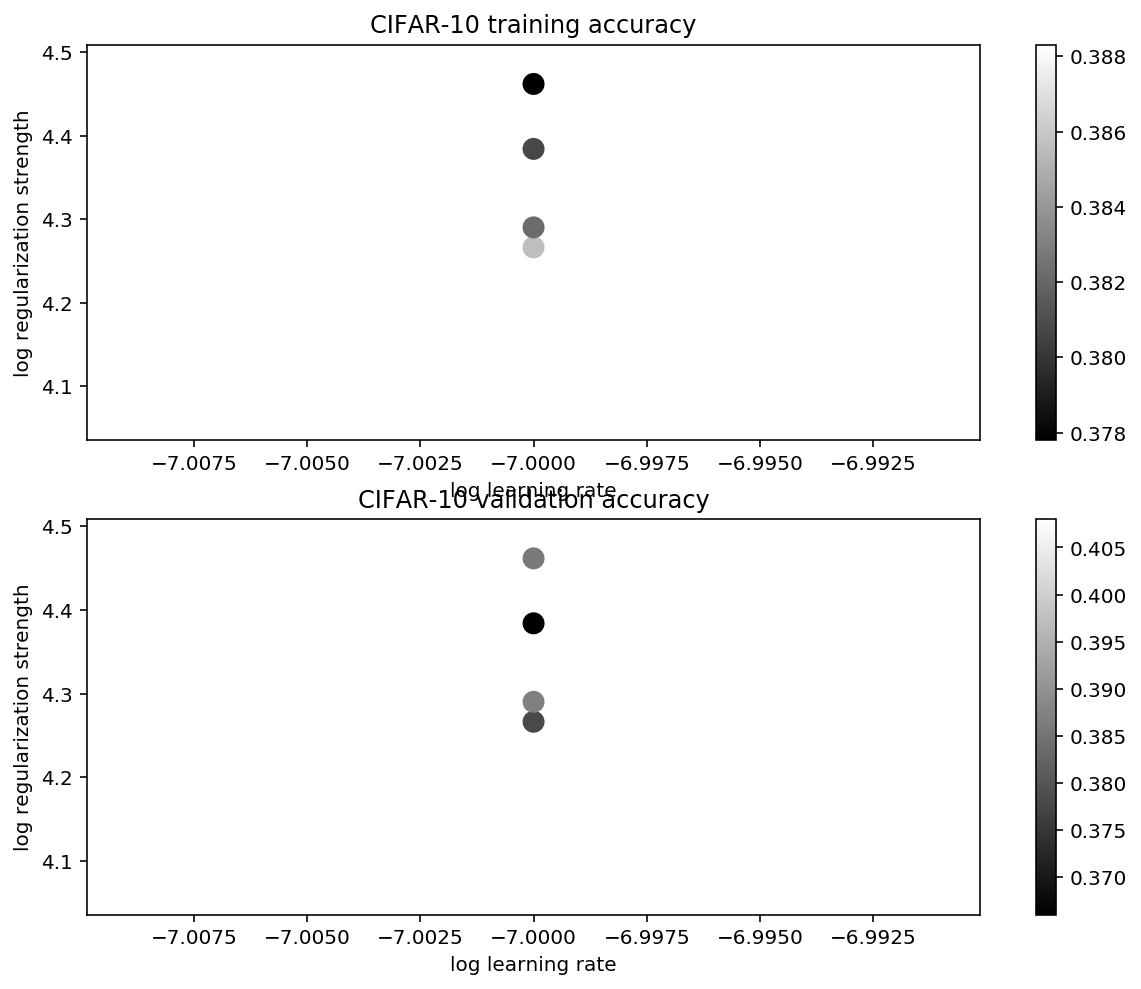

In [540]:
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [541]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: {0}'.format(test_accuracy))

linear SVM on raw pixels final test set accuracy: 0.376


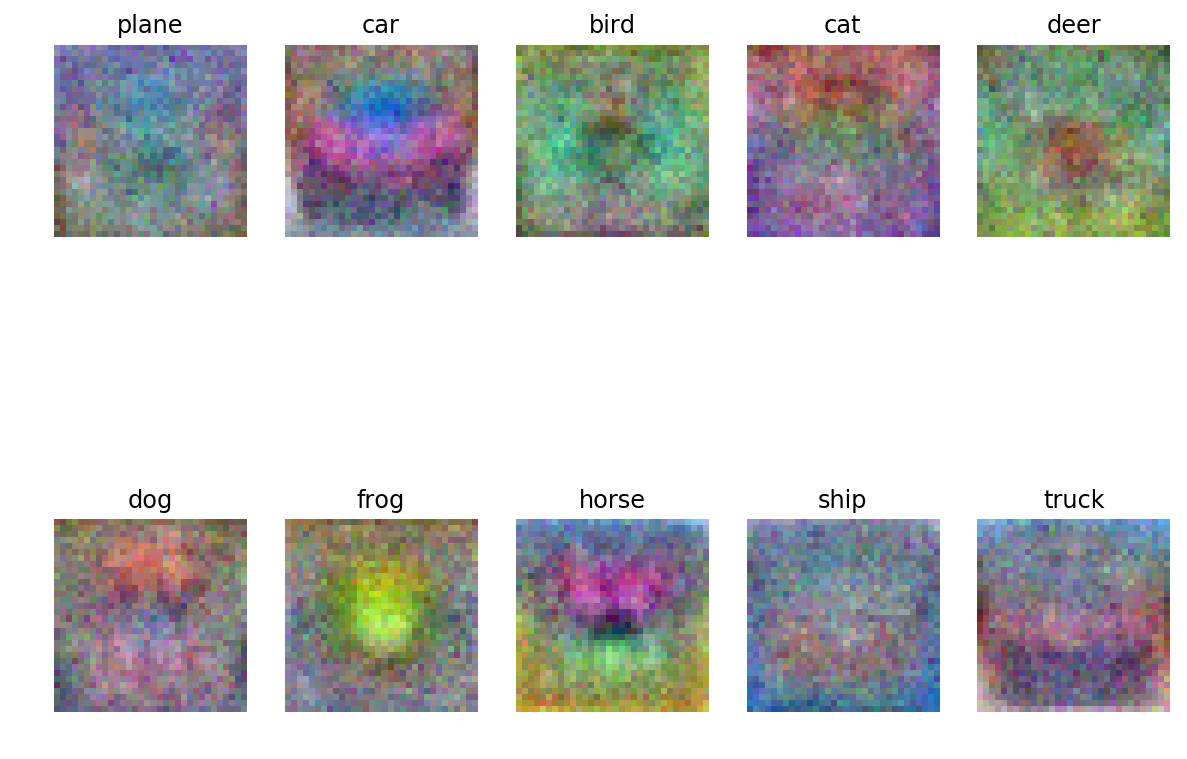

In [542]:
w = svm.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])